This notebook contains the code to analyze the results produced by the machine learning models created in the last phase of the Predicting Water Pump Status project.


In [4]:
import os
import csv 
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
%config IPCompleter.greedy=True

In [5]:
def grouped_bar(categories, group1_values, group1_label, group2_values, group2_label, y_label, title, xlabel_rotation, annotate):
    """inputs: 
       categories = array of string values to use for bars on x axis
       group1_values = array of numeric values for 1st group
       group1_label = string for group1 legend entry
       group2_values = array of numeric values for 2nd group
       group2_label = string for group2 legend entry
       y_label = string for y axis label
       title = string for plot title
       xlabel_rotation = angle in degrees | ‘vertical’ | ‘horizontal’ 
       annotate = boolean for indicating placement of numeric total on top of bars
       
       outputs:
       none
       
       function:
       plots grouped bar chart
    """
    x = np.arange(len(categories))  # the label locations
    width = 0.35  # the width of the bars
   # plt.figure(figsize=(10,10))
    fig, ax = plt.subplots(figsize=(10, 7))
    #fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, group1_values, width, label=group1_label)
    rects2 = ax.bar(x + width/2, group2_values, width, label=group2_label)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=xlabel_rotation)
    #ax.legend()
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    if annotate:
        autolabel(rects1)
        autolabel(rects2)

    fig.tight_layout()
    file_name = title + '.png'
    fig.savefig(file_name, bbox_inches='tight', pad_inches=0.02)
    plt.show()

def three_grouped_bar(categories, group1_values, group1_label, group2_values, group2_label, group3_values, group3_label, y_label, title, xlabel_rotation, annotate):
    """inputs: 
       categories = array of string values to use for bars on x axis
       group1_values = array of numeric values for 1st group
       group1_label = string for group1 legend entry
       group2_values = array of numeric values for 2nd group
       group2_label = string for group2 legend entry
       y_label = string for y axis label
       title = string for plot title
       xlabel_rotation = angle in degrees | ‘vertical’ | ‘horizontal’ 
       annotate = boolean for indicating placement of numeric total on top of bars
       
       outputs:
       none
       
       function:
       plots grouped bar chart
    """
    x = np.arange(len(categories))  # the label locations
    width = 0.33  # the width of the bars
   # plt.figure(figsize=(10,10))
    fig, ax = plt.subplots(figsize=(10, 7))
    #fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, group1_values, width, label=group1_label, color='green')
    rects2 = ax.bar(x + width/2, group2_values, width, label=group2_label, color='red')
    rects3 = ax.bar(x + width+0.16, group3_values, width, label=group3_label, color='yellow')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=xlabel_rotation)
    
    #ax.legend()
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    if annotate:
        autolabel(rects1)
        autolabel(rects2)

    fig.tight_layout()
    file_name = title + '.png'
    fig.savefig(file_name, bbox_inches='tight', pad_inches=0.02)
    plt.show()

def plot_all_algorithm_results(filter_to_plot, df_results):
    """inputs: 
       filter_to_plot = string value to filter results
    """
    df_results_plot = df_results[df_results['data note']==filter_to_plot]
    categories = df_results_plot['algorithm']
    group1_values = np.array(df_results_plot['Func F1'])
    group1_label = 'Func F1'
    group2_values = np.array(df_results_plot['Non_Func F1'])
    group2_label = 'Non_Func F1'
    group3_values = np.array(df_results_plot['Needs_Maint F1'])
    group3_label = 'Needs_Maint F1'
    y_label = 'Performance'
    title = 'Algorithm Performance on ' + filter_to_plot + ' Dataset'
    three_grouped_bar(categories, group1_values, group1_label, group2_values, group2_label, group3_values, group3_label,
                      y_label, title, 'vertical', annotate=False)




def plot_algorithm_results(filter_to_plot, df_results):
    """inputs: 
       filter_to_plot = string value to filter results
    """
    df_results_plot = df_results[df_results['data note']==filter_to_plot]
    categories = df_results_plot['algorithm']
    group1_values = np.array(df_results_plot['Func F1'])
    group1_label = 'Func F1'
    group2_values = np.array(df_results_plot['Non_Func F1'])
    group2_label = 'Non_Func F1'
    y_label = 'Performance'
    title = 'Algorithm Performance on ' + filter_to_plot + ' Dataset'
    grouped_bar(categories, group1_values, group1_label, group2_values, group2_label, y_label, title, 'vertical', annotate=False)



In [6]:
col_names = ['algorithm', 'data note', 'Func F1', 'Non_Func F1', 'Needs_Maint F1', 'train_acc', 'test_acc', 'run time', 'hyper_params']
    
df_results = pd.read_csv('C2MLResults_3.csv', header=None, names=col_names)
df_results.head()

,algorithm,data note,Func F1,Non_Func F1,Needs_Maint F1,train_acc,test_acc,run time,hyper_params
0,KNeighborsClassifier,"low_var, ohe",0.781549,0.653015,0.133195,0.710411,0.712795,0 days 00:00:51.587570000,"{'algorithm': 'auto', 'leaf_size': 30, 'metric..."
0,LogisticRegression,"low_var, ohe",0.776321,0.657914,0.056306,0.709948,0.709175,0 days 00:00:01.959735000,"{'C': 1.0, 'class_weight': None, 'dual': False..."
0,LogisticRegression FR,"low_var, ohe",0.691849,0.348743,0.000000,0.559944,0.571549,0 days 00:00:00.312436000,"{'C': 1.0, 'class_weight': None, 'dual': False..."
0,Random Forest,"low_var, ohe",0.817179,0.770362,0.312317,0.921884,0.771044,0 days 00:00:07.526472000,"{'bootstrap': True, 'class_weight': None, 'cri..."
0,Random Forest FR,"low_var, ohe",0.696743,0.314412,0.000000,0.572171,0.570118,0 days 00:00:01.636282000,"{'bootstrap': True, 'class_weight': None, 'cri..."


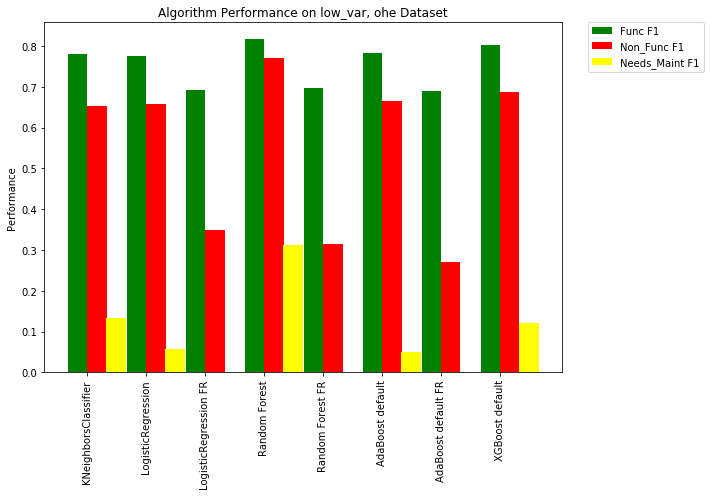

In [7]:
results_to_plot = 'low_var, ohe'
plot_all_algorithm_results(results_to_plot, df_results)

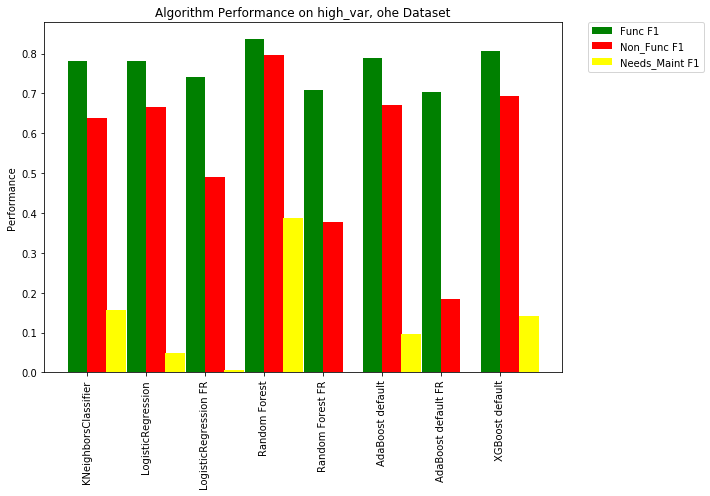

In [8]:
results_to_plot = 'high_var, ohe'
algs = ['KNeighborsClassifier', 'LogisticRegression', 'LogisticRegression FR', 'Random Forest', 'Random Forest FR',
        'AdaBoost default', 'AdaBoost default FR', 'XGBoost default']
df_to_plot = df_results[df_results['algorithm'].isin(algs)]
plot_all_algorithm_results (results_to_plot, df_to_plot)

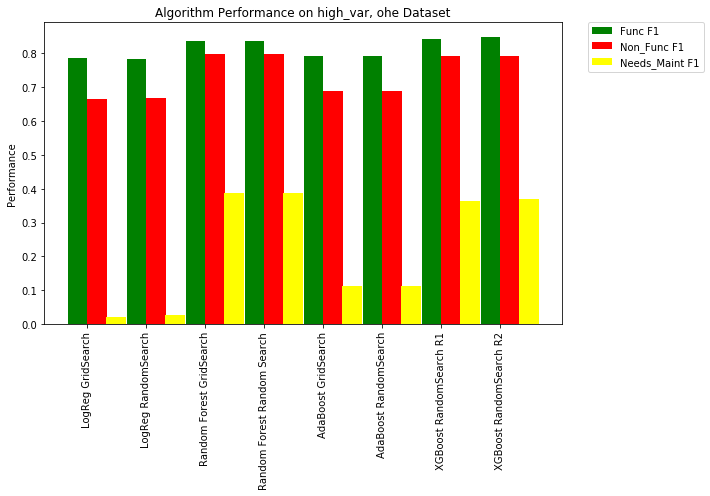

In [9]:
results_to_plot = 'high_var, ohe'
algs = ['LogReg GridSearch', 'LogReg RandomSearch', 'Random Forest GridSearch', 'Random Forest Random Search', 
        'AdaBoost GridSearch','AdaBoost RandomSearch', 'XGBoost RandomSearch R1', 'XGBoost RandomSearch R2']
df_to_plot = df_results[df_results['algorithm'].isin(algs)]
plot_all_algorithm_results (results_to_plot, df_to_plot)